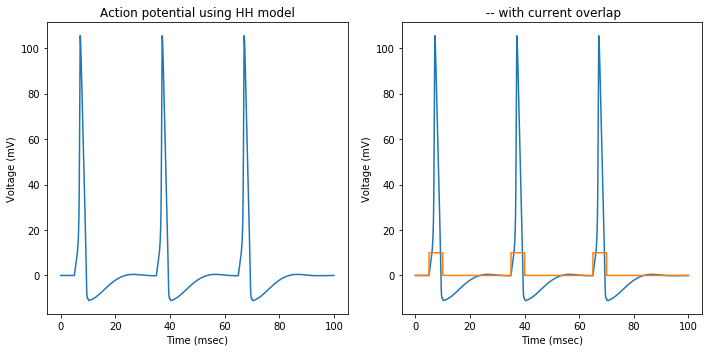

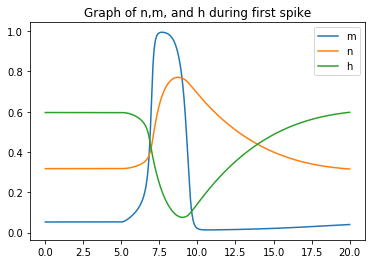

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from math import *

dt     = 0.01
time   = [t/100 for t in range(1,10000)]
I      = [0 for i in range(1,10000)]
V      = [0]
n      = []
m      = []
h      = []
E_Na   = 115.0
E_K    = -12.0
E_L    = 10.6
g_Na   = 120.0
g_K    = 36.0
g_L    = 0.3
C      = 1.0

# the K gates controlled by n
def alpha_n(v = 0): 
    alpha_n = (0.1-(0.01*v))/(exp(1.0-(0.1*v)) - 1) if v!=10 else 0.1
    #print(alpha_n)
    return alpha_n

def beta_n(v = 0):
    beta_n = 0.125*exp(-v/80)
    return beta_n

# the Na gates cotrolled by m
def alpha_m(v = 0):
    alpha_m = (2.5 - (0.1*v))/(exp(2.5 - (0.1*v)) - 1.0)
    return alpha_m

def beta_m(v = 0):
    beta_m = 4*exp(-v/18.0)
    return beta_m

# the Na gates cotrolled by h
def alpha_h(v = 0):
    alpha_h = 0.07*exp(-v/20.0)
    return alpha_h

def beta_h(v = 0):
    beta_h = 1.0/(exp(3.0 - (0.1*v)) + 1.0)
    return beta_h

def initN():
    return alpha_n()/(alpha_n() + beta_n())
    
def initM():
    return alpha_m()/(alpha_m() + beta_m())

def initH():
    return alpha_h()/(alpha_h() + beta_h())

# initialize values for n, m and h
n.append(initN())
m.append(initM())
h.append(initH())

def findDn(prevV, prevN):
    a = alpha_n(prevV)
    b = beta_n(prevV)
    return (a*(1.0 - prevN)) - (b*prevN)

def findDm(prevV, prevM):
    a = alpha_m(prevV)
    b = beta_m(prevV)
    return (a*(1.0 - prevM)) - (b*prevM)

def findDh(prevV, prevH):
    a = alpha_h(prevV)
    b = beta_h(prevV)
    return (a*(1.0 - prevH)) - (b*prevH)

for j, t in enumerate(time):
    if ((10 >= t >= 5) or (40 >= t >= 35) or (70 >= t>= 65)):
        I[j] = 10  #current injection (uA/cm2)
    
for j in range(1, len(time)):
    
    #find derivatives
    dn = dt*findDn(V[j-1], n[j-1])
    dm = dt*findDm(V[j-1], m[j-1])
    dh = dt*findDh(V[j-1], h[j-1])
    
    # add them to n,m, and h lists
    n.append(n[j-1] + dn)
    m.append(m[j-1] + dm)
    h.append(h[j-1] + dh)
    
    # find each of the chunks for finding dv separately
    naChunk = g_Na*pow(m[j-1], 3.0)*(h[j-1])*(V[j-1] - E_Na)
    kChunk = g_K*pow(n[j-1], 4.0)*(V[j-1] - E_K)
    negChunk = g_L*(V[j-1] - E_L)
  
    dv = dt*(I[j-1] - naChunk - kChunk - negChunk)/C
    
    V.append(V[j-1] + dv) 

#plot graph by first adjust size
plt.figure(figsize = (10,5))

#subplot without current overlap
plt.subplot(1,2,1)
plt.plot(time, V)
plt.xlabel('Time (msec)') 
plt.ylabel('Voltage (mV)') 
plt.title('Action potential using HH model')

#subplot with current overlap
plt.subplot(1,2,2)
plt.plot(time, V, label = 'voltage')
plt.plot(time, I, label = 'current')
plt.xlabel('Time (msec)') 
plt.ylabel('Voltage (mV)') 
plt.title(' -- with current overlap')
plt.tight_layout()

#figure with n, m, and h
plt.figure()
plt.plot(time[:2000], m[:2000], label = 'm')
plt.plot(time[:2000], n[:2000], label = 'n')
plt.plot(time[:2000], h[:2000], label = 'h')
plt.title('Graph of n,m, and h during first spike')
plt.legend()